In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset

df = pd.read_csv('data.csv')

In [4]:
df.shape # 11914 rows, 16 columns

(11914, 16)

In [5]:
# view data 

df.head().append(df.tail())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [6]:
# do Lowercases and replace spaces with underscores for values in all string columns of the DataFrame

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [7]:
# Describe the statistics of each column, number count, mean, variance STD, minimum min, median and maximum
# to know whether ther is abnormal value

df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
# info: to know the type of each column of data
# to know whether there are special symbol exceptions

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

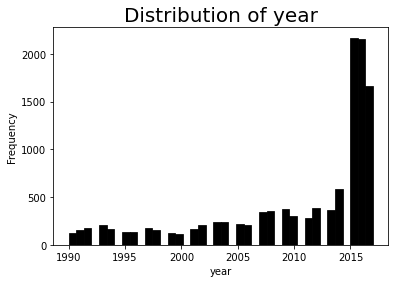

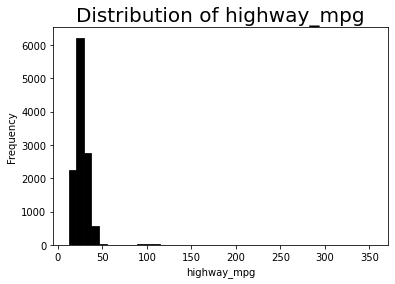

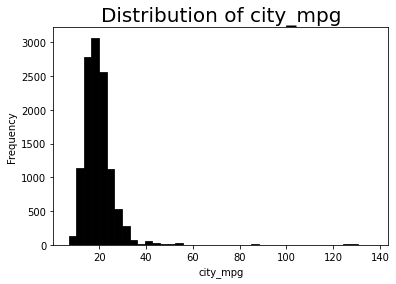

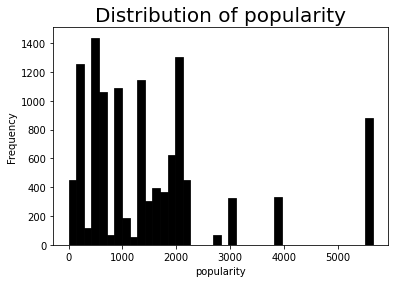

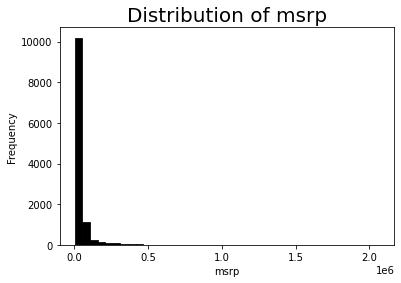

In [9]:
# Distribution of all numerical variables

number_columns = list(df.dtypes[df.dtypes == 'int64'].index)

for i in number_columns:
    sns.histplot(df[i], bins=40, color='black', alpha=1)
    plt.title("Distribution of %s" %i, fontsize = 20)
    plt.ylabel("Frequency")
    plt.xlabel("%s" %i)
    plt.show();
    print('\n')


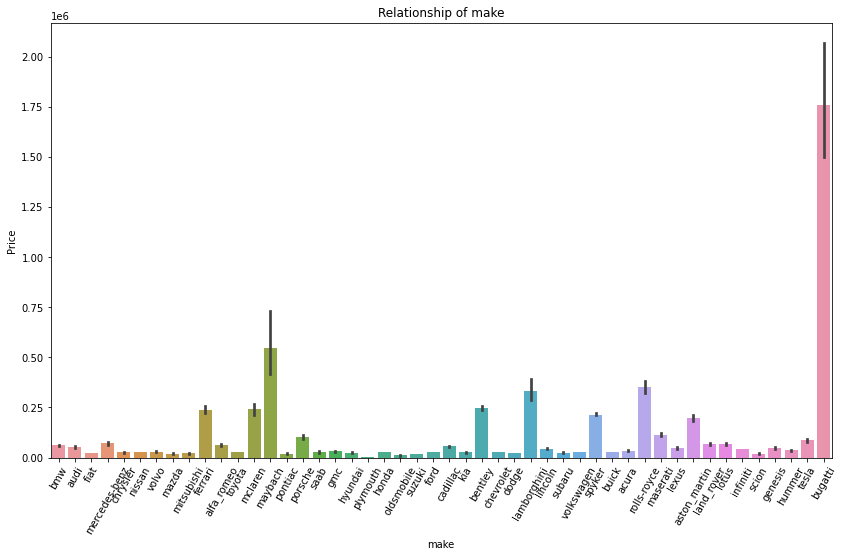

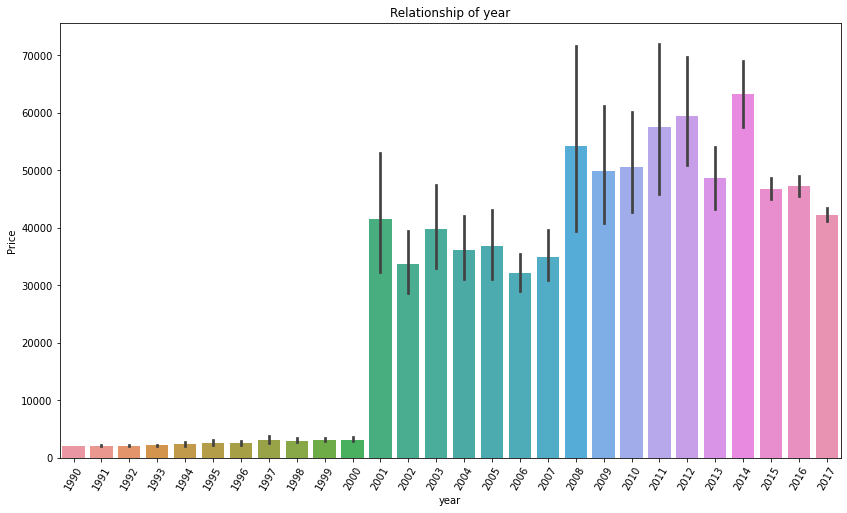

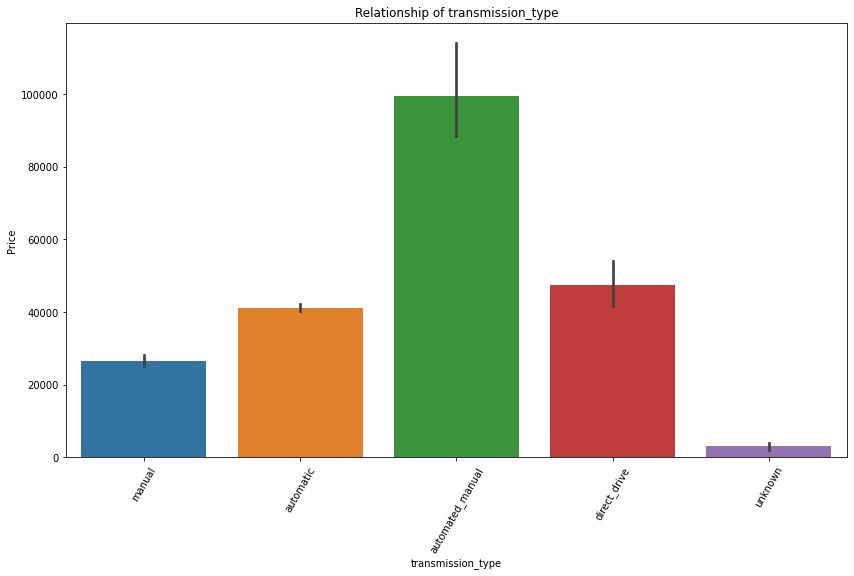

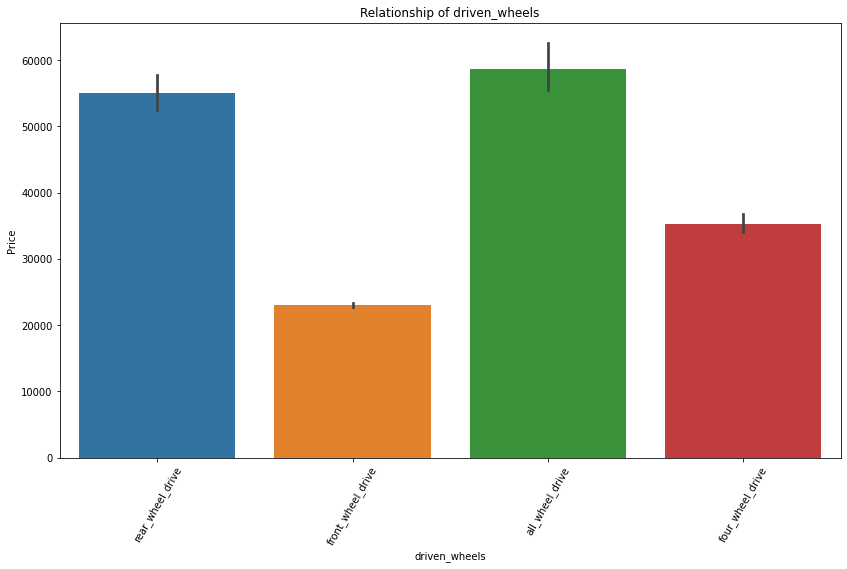

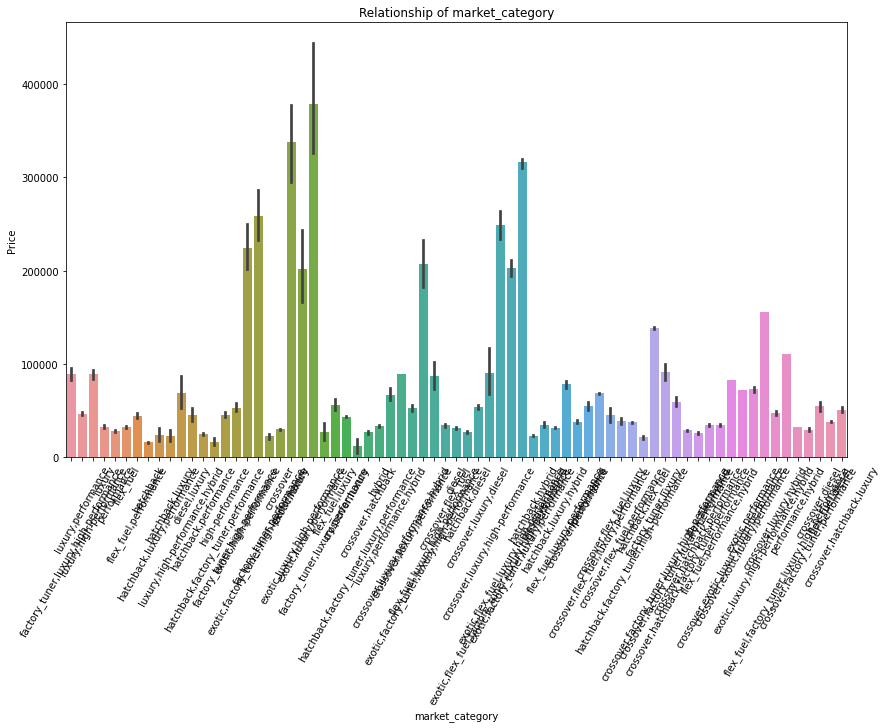

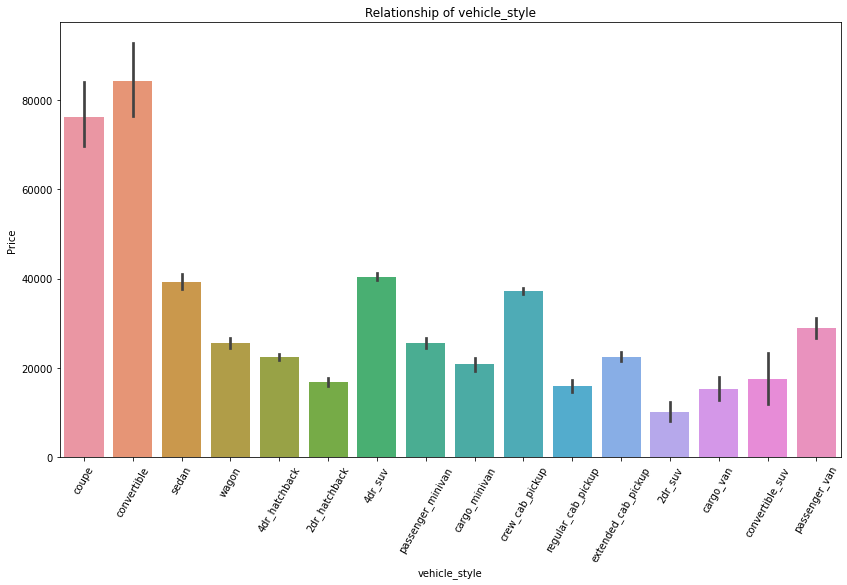

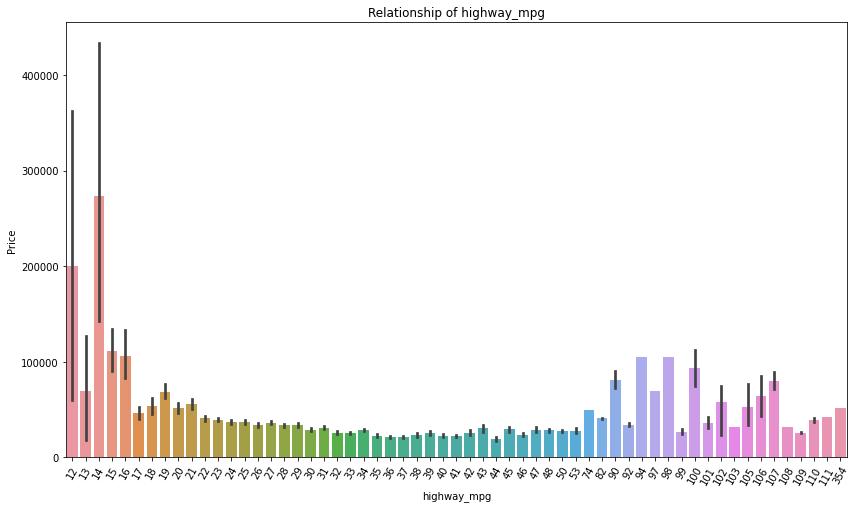

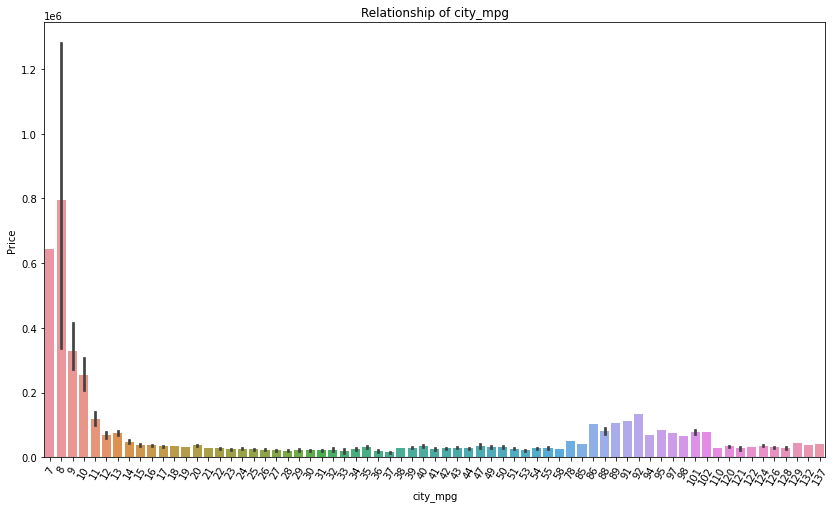

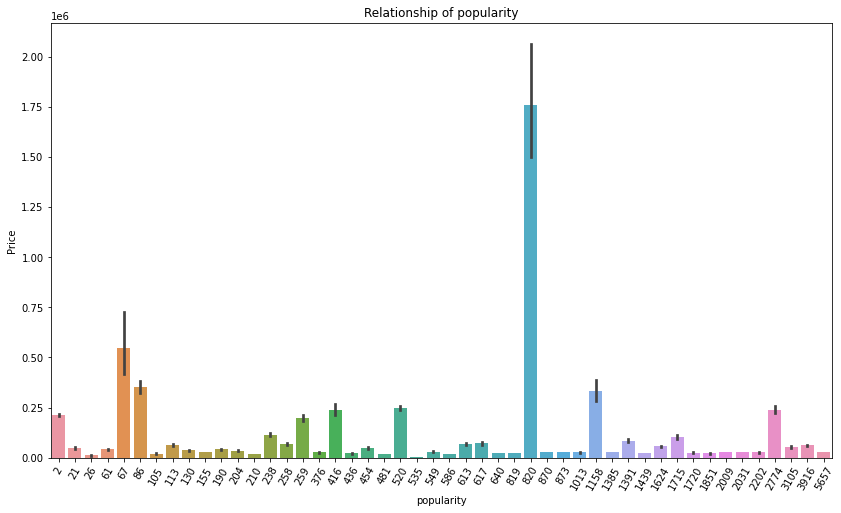

In [10]:
# relationship between varivales and msrp, just list some of that.

relat_columns = ['make','year','transmission_type', 'driven_wheels', 'market_category', 
                 'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity']

for i in relat_columns:
    plt.figure(figsize=(14, 8))
    sns.barplot(df[i],'msrp',data=df)
    plt.xticks(rotation=60)
    plt.ylabel("Price")
    plt.xlabel("%s" %i)
    plt.title("Relationship of %s" %i)
    plt.show();
    print('\n')

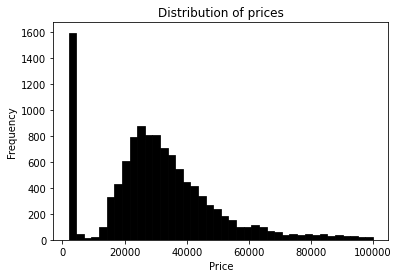

In [11]:
# target variable is msrp, so move the long tail

plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

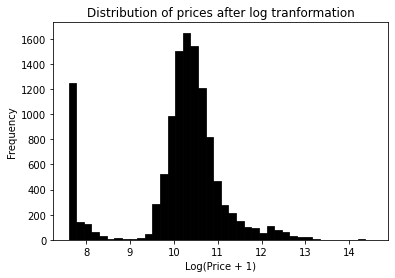

In [12]:
# make the target distribution look like the normal distribution
# The normal distribution, also known as Gaussian, follows the bell-shaped curve,
# which is symmetrical and has a peak in the center.
# using the log transformation. new: y=log(y+1)

log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [13]:
# check missing value

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<AxesSubplot:>

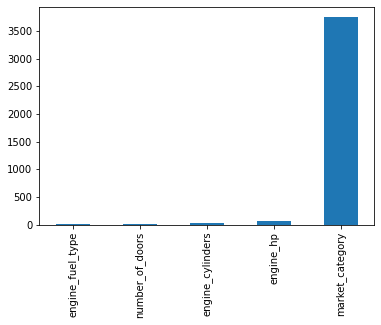

In [14]:
# nan visaulization

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [15]:
# check duplicated data

df.duplicated().sum()

715

In [16]:
# drom duplicated data 

df.drop_duplicates(inplace = True)

# check again
df.duplicated().sum()

0

In [17]:
# Validation framework

# get total of rows
num_rows = len(df)
print(num_rows)

11199


In [18]:
# split the DataFrame to three sets:
#   20% of data goes to validation.
#   20% goes to test.
#   The remaining 60% goes to train.

num_val = int(0.2 * num_rows)
num_test = int(0.2 * num_rows)
num_train = num_rows - (num_val + num_test)

In [19]:
# setting random seed and using shuffle method

np.random.seed(2)
idx = np.arange(num_rows)

np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

# using iloc to slice the dataset 
df_train = df_shuffled.iloc[:num_train].copy()
df_val = df_shuffled.iloc[num_train:num_train+num_val].copy()
df_test = df_shuffled.iloc[num_train+num_val:].copy()

In [20]:
# copy the original value of msrp 
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

# using log transformation to get required values
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

# avoid accidentally using the target variable
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [22]:
y_test

array([10.2994409 , 10.18418277,  7.60140233, ..., 10.00405661,
       11.21318431, 11.02843338])

# Linear Regression

In [29]:
def linear_regression(xi):
    result = w0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

In [31]:
def dot(xi, w):
    n = len(w)
    result = 0.0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

In [32]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [42]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Baseline Solution

In [43]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']
df_num = df_train[base]

In [44]:
df_num = df_num.fillna(0)

In [48]:
df_num.head().append(df_num.tail())

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
7989,525.0,10.0,22,13,3105
8709,232.0,0.0,22,16,586
9117,381.0,8.0,17,13,2031
6593,303.0,6.0,22,16,190
3799,245.0,4.0,30,20,5657
8580,170.0,4.0,32,25,2009
10796,177.0,4.0,31,34,586
11768,410.0,6.0,24,16,1624
2941,132.0,4.0,37,28,2031
2746,260.0,4.0,30,22,1385


In [46]:
df_num.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [65]:
X_train = df_num.values

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

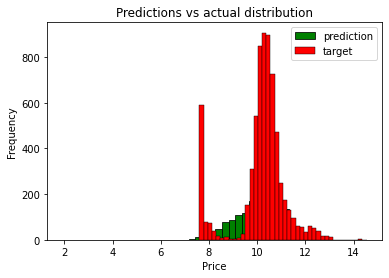

In [89]:
sns.histplot(y_pred, label='prediction', bins=40, color='green', alpha=1)
sns.histplot(y_train, label='target', bins=40, color='red', alpha=1)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')
plt.show()

In [67]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [68]:
rmse(y_train, y_pred)

0.726461367095085

In [57]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [58]:
X_val = prepare_X(df_val)

y_pred = w_0 + X_val.dot(w)

In [59]:
rmse(y_val, y_pred)

0.768913934061229

In [69]:
# trains the model
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print('validation:', rmse(y_val, y_pred))

validation: 0.768913934061229


# Simple feature engineering

In [70]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num.values 
    return X

In [82]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


train 0.5051713551058075
validation: 0.5407119281821063


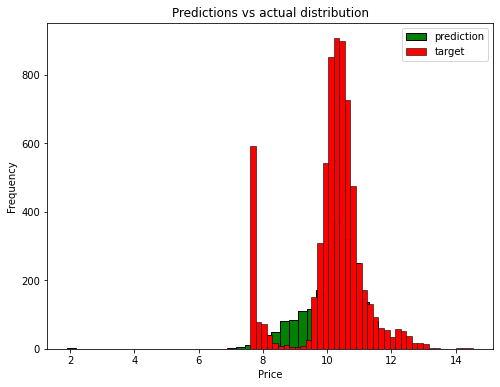

In [88]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, label='prediction', bins=40, color='green', alpha=1)
sns.histplot(y_train, label='target', bins=40, color='red', alpha=1)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')
plt.show()

In [76]:
df['make'].value_counts().head(5)

chevrolet     1083
ford           825
toyota         719
volkswagen     568
nissan         551
Name: make, dtype: int64

In [78]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'toyota', 'volkswagen', 'nissan']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [80]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5051713551058075
validation: 0.5407119281821063


In [90]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                6658
premium_unleaded_(required)                     1956
premium_unleaded_(recommended)                  1392
flex-fuel_(unleaded/e85)                         887
diesel                                           150
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         53
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [91]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'toyota', 'volkswagen', 'nissan']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [92]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


train: 0.47441101892932064
validation: 0.5257162377487212


In [94]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                6658
premium_unleaded_(required)                     1956
premium_unleaded_(recommended)                  1392
flex-fuel_(unleaded/e85)                         887
diesel                                           150
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         53
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [95]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'toyota', 'volkswagen', 'nissan']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [96]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.47441101892932064
validation: 0.5257162377487212


In [97]:
df['transmission_type'].value_counts()

automatic           7932
manual              2634
automated_manual     553
direct_drive          68
unknown               12
Name: transmission_type, dtype: int64

In [98]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'toyota', 'volkswagen', 'nissan']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [99]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.46884348588477937
validation: 0.5096100938464285


In [100]:
df['driven_wheels'].value_counts()

front_wheel_drive    4354
rear_wheel_drive     3212
all_wheel_drive      2308
four_wheel_drive     1325
Name: driven_wheels, dtype: int64

In [101]:
df['market_category'].value_counts().head(5)

crossover             1075
flex_fuel              855
luxury                 819
luxury,performance     659
hatchback              574
Name: market_category, dtype: int64

In [102]:
df['vehicle_size'].value_counts().head(5)

compact    4395
midsize    4121
large      2683
Name: vehicle_size, dtype: int64

In [103]:
df['vehicle_style'].value_counts().head(5)

sedan            2843
4dr_suv          2434
coupe            1175
convertible       741
4dr_hatchback     663
Name: vehicle_style, dtype: int64

In [105]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'toyota', 'volkswagen', 'nissan']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [106]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 479.02644232288367
validation: 507.1349753714465


In [107]:
w_0

1.4601148974224016e+16